In [6]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data_folder: Path = Path("../")
benchmark_speed_file: Path = data_folder / "benchmark_results_1.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int.csv"
sns.set(rc={'figure.figsize':(20,7)})
plt.tight_layout()

<Figure size 1440x504 with 0 Axes>

## Preprocessing

In [59]:
benchmark_speeds: DataFrame = pd.read_csv(benchmark_speed_file)
benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [lib.replace("SIMDCompressionAndIntersection", "SIMDCAI").replace("with_select", "with_direct") for lib in benchmark_speeds["library"]]
benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds["name"]]

# When we display all codecs, the plots get a bit full and messy. So we can filter them a bit
# and just display the codecs we want to see at the moment
filtered_fast_pfor_codecs: DataFrame = benchmark_speeds.loc[~(benchmark_speeds["library"].str.contains("fastPFOR"))]
only_fast_pfor: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].str.contains("fastPFOR"))]
most_interesting_libraries: List[str] = ["turboPFOR_direct", "turboPFOR", "sdsl_lite_dac_vector", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking", "maskedVByte"]
even_more_interesting_libraries = ["turboPFOR_direct", "turboPFOR", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking"]
limited_to_interesting_libs: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].isin(most_interesting_libraries))]
dataset_filtered: DataFrame = limited_to_interesting_libs
benchmark_speeds["lib"] = [name.split("_")[0] for name in benchmark_speeds["library"]]
benchmark_speeds

name  iterations  \
0     BenchmarkColumnCompressionFixture/unencoded_be...       85718   
1     BenchmarkColumnCompressionFixture/unencoded_be...       93565   
2     BenchmarkColumnCompressionFixture/unencoded_be...       85986   
3     BenchmarkColumnCompressionFixture/unencoded_be...       93372   
4     BenchmarkColumnCompressionFixture/unencoded_be...       77031   
...                                                 ...         ...   
2065  BenchmarkColumnCompressionFixture/SIMDCompress...          15   
2066  BenchmarkColumnCompressionFixture/SIMDCompress...           2   
2067  BenchmarkColumnCompressionFixture/SIMDCompress...           1   
2068  BenchmarkColumnCompressionFixture/SIMDCompress...           2   
2069  BenchmarkColumnCompressionFixture/SIMDCompress...           1   

         real_time      cpu_time time_unit  bytes_per_second  \
0     7.927980e+03  7.889640e+03        ns               NaN   
1     7.253830e+03  7.217460e+03        ns               NaN   
2     8.174100e+03  8.082410e+03        ns               NaN   
3     8.117820e+03  7.961720e+03        ns               NaN   
4     8.731090e+03  8.602870e+03        ns               NaN   
...            ...           ...       ...               ...   
2065  4.626680e+07  4.562120e+07        ns               NaN   
2066  4.575520e+08  4.522020e+08        ns               NaN   
2067  2.967170e+09  2.926360e+09        ns               NaN   
2068  4.564300e+08  4.491690e+08        ns               NaN   
2069  2.982560e+09  2.941960e+09        ns               NaN   

      items_per_second  label  error_occurred  error_message  \
0                  NaN    NaN             NaN            NaN   
1                  NaN    NaN             NaN            NaN   
2                  NaN    NaN             NaN            NaN   
3                  NaN    NaN             NaN            NaN   
4                  NaN    NaN             NaN            NaN   
...                ...    ...             ...            ...   
2065               NaN    NaN             NaN            NaN   
2066               NaN    NaN             NaN            NaN   
2067               NaN    NaN             NaN            NaN   
2068               NaN    NaN             NaN            NaN   
2069               NaN    NaN             NaN            NaN   

                                             input_data  \
0                                         small_numbers   
1                                         small_numbers   
2                             sequential_sorted_numbers   
3                             sequential_sorted_numbers   
4                                          huge_numbers   
...                                                 ...   
2065         month_categorical_numbers_get_poslist_1000   
2066        month_categorical_numbers_get_poslist_10000   
2067        month_categorical_numbers_get_poslist_65000   
2068  month_categorical_numbers_get_poslist_10000_so...   
2069  month_categorical_numbers_get_poslist_65000_so...   

                           library            process_type        lib  
0                        unencoded                encoding  unencoded  
1                        unencoded                decoding  unencoded  
2                        unencoded                encoding  unencoded  
3                        unencoded                decoding  unencoded  
4                        unencoded                encoding  unencoded  
...                            ...                     ...        ...  
2065  SIMDCAI_varintgb_with_direct  decoding_points_nocopy    SIMDCAI  
2066  SIMDCAI_varintgb_with_direct  decoding_points_nocopy    SIMDCAI  
2067  SIMDCAI_varintgb_with_direct  decoding_points_nocopy    SIMDCAI  
2068  SIMDCAI_varintgb_with_direct  decoding_points_nocopy    SIMDCAI  
2069  SIMDCAI_varintgb_with_direct  decoding_points_nocopy    SIMDCAI  

[2070 rows x 14 columns]

## Encoding

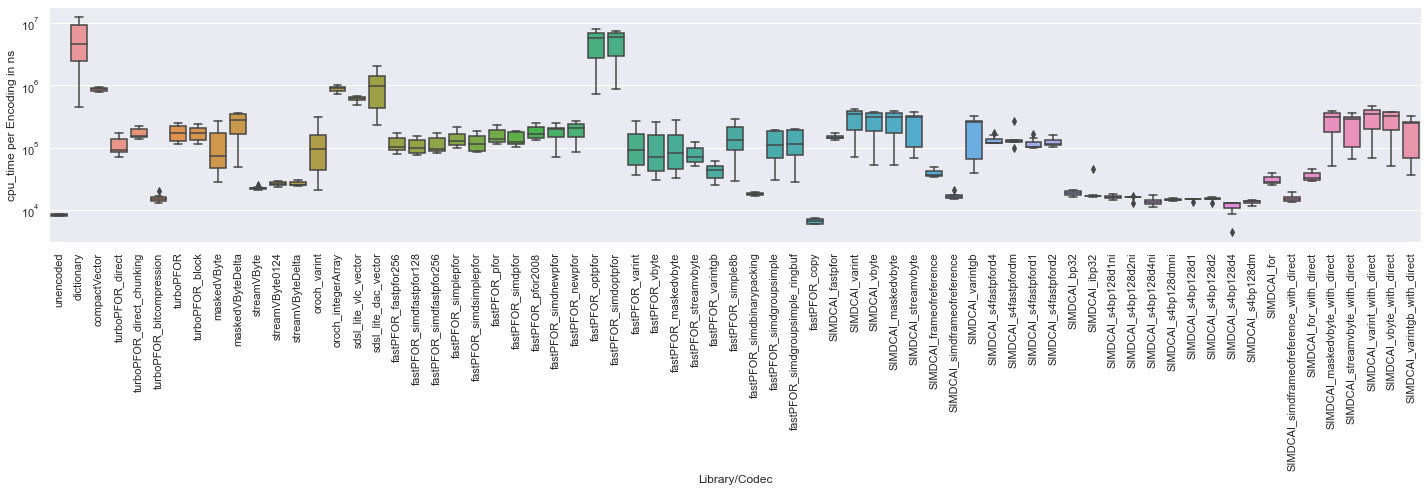

In [66]:
encoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set(
    xlabel='Library/Codec', 
    ylabel='cpu_time per Encoding in ns'
)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.tight_layout()
plt.savefig("libraries_encoding.svg", format="svg")


## Encoding (interesting libs)

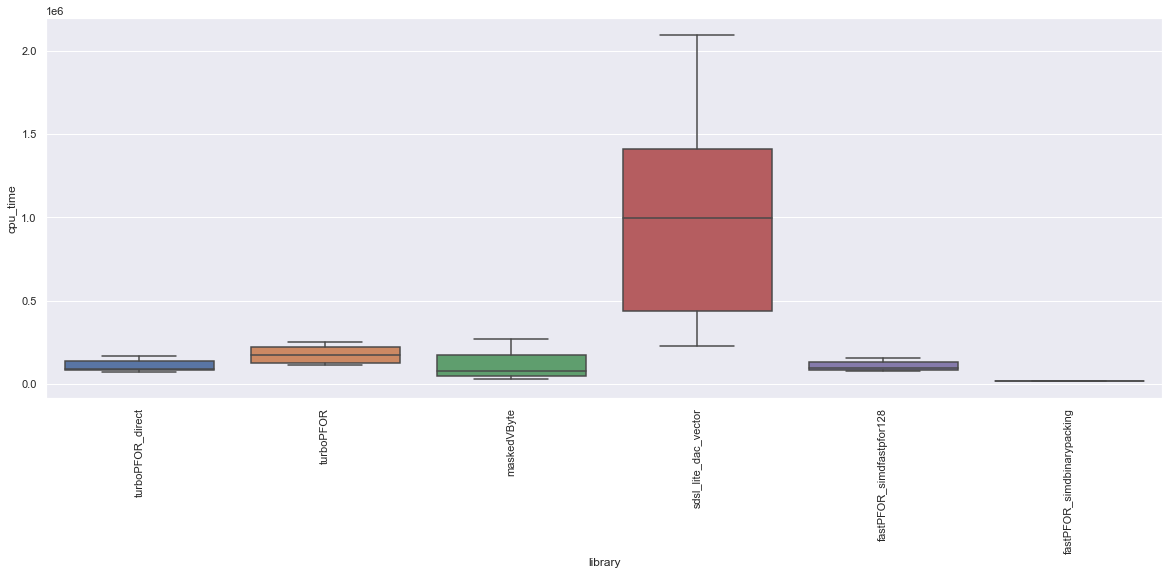

In [14]:
encoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Decoding

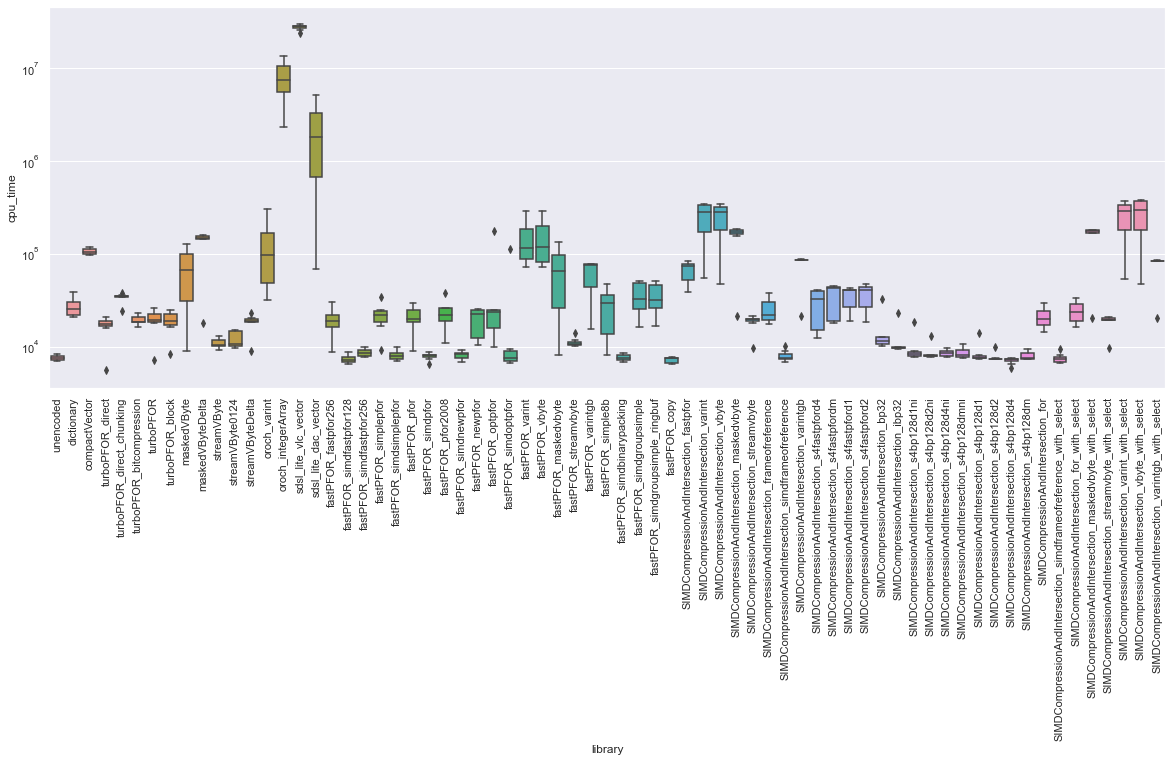

In [16]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")

## Decoding (only fastest below 10^4)

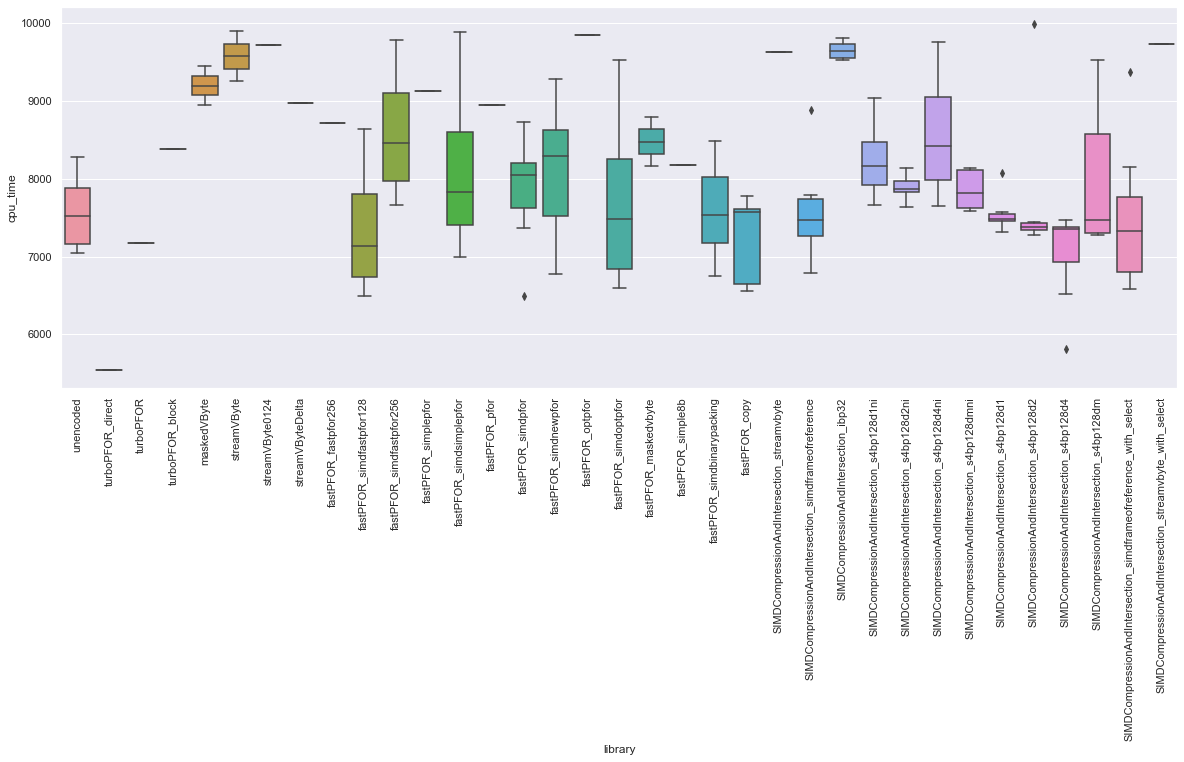

In [18]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["cpu_time"] < 10000]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Point based decoding

av_numbers


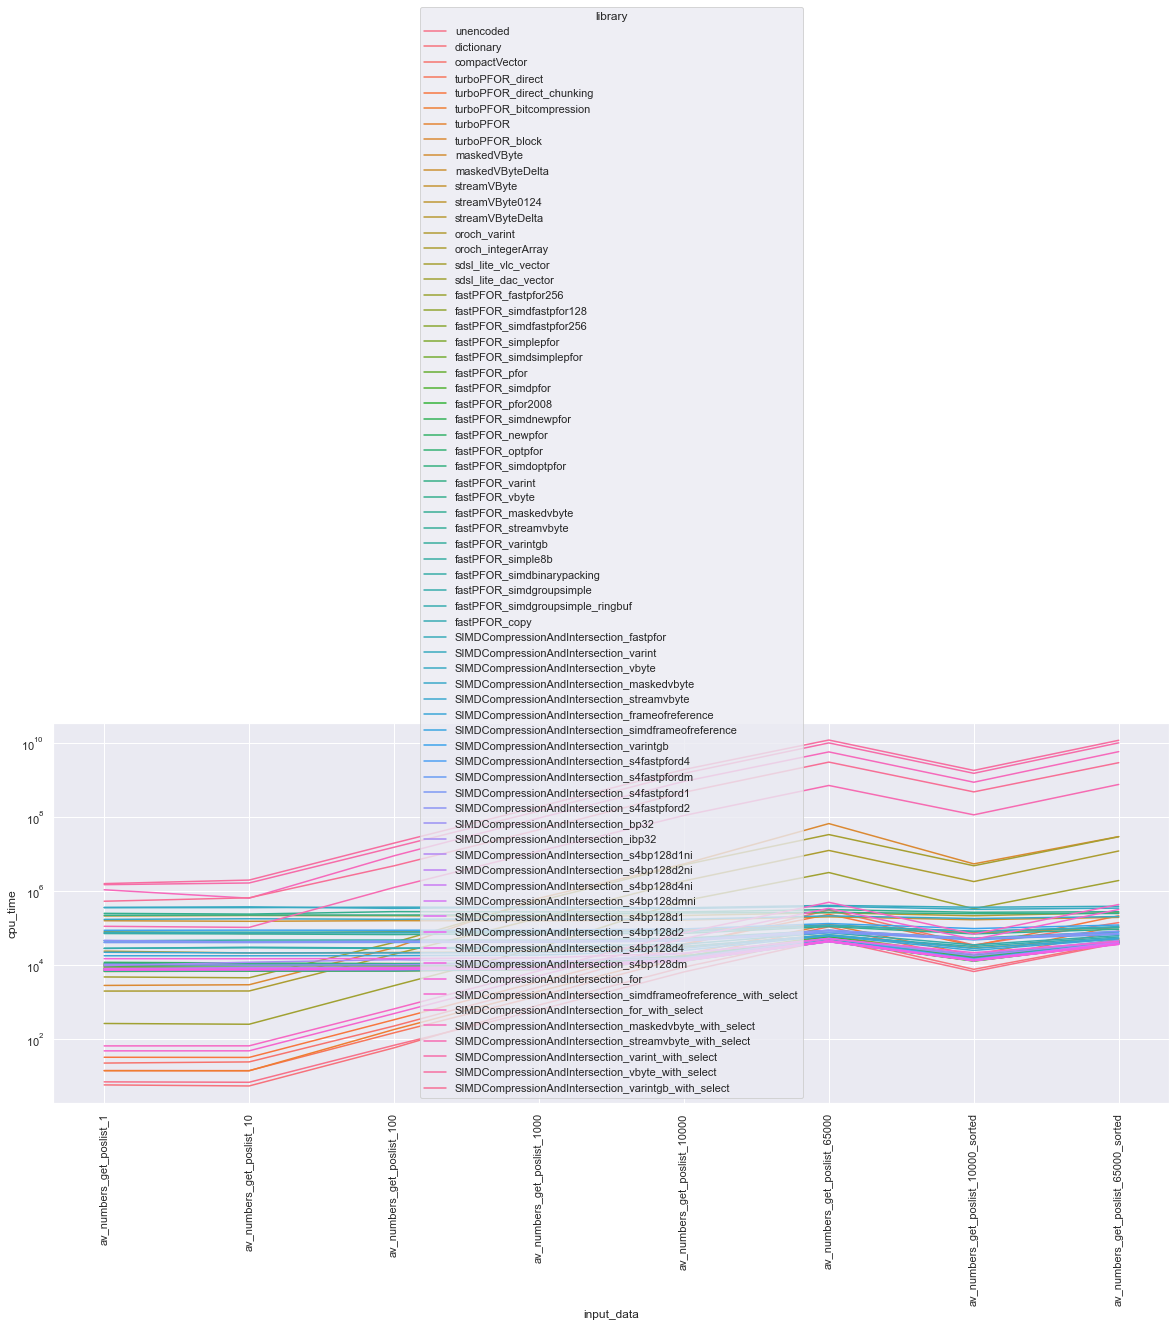

month_categorical


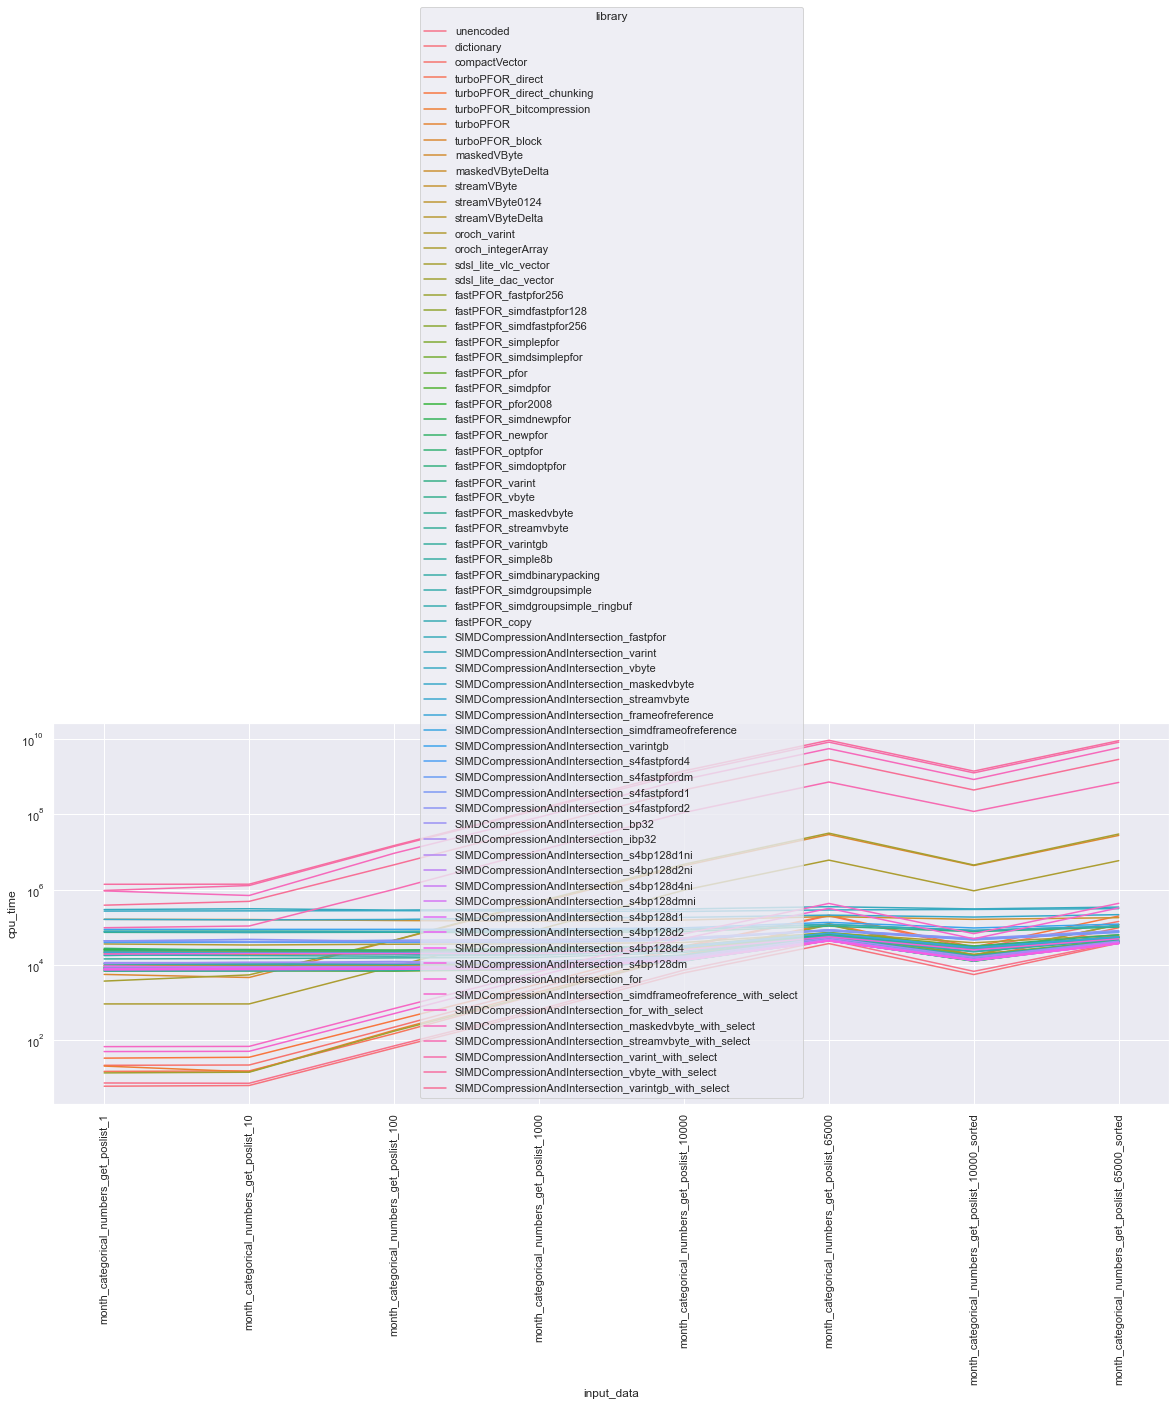

In [20]:
for data_distrib in ["av_numbers", "month_categorical"]:
    print(data_distrib)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding_points_nocopy"]
    av_decoding_points = decoding_points[decoding_points["input_data"].str.contains(data_distrib)]
    plot: sns.lineplot = sns.lineplot(data=av_decoding_points, x="input_data", y="cpu_time", hue="library")
    plot.set_yscale("log")
    plt.draw()
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()


## point decoding libs

fast random access libs:  ['unencoded', 'dictionary', 'compactVector', 'turboPFOR_direct', 'turboPFOR_direct_chunking', 'turboPFOR_bitcompression', 'SIMDCompressionAndIntersection_simdframeofreference_with_select', 'SIMDCompressionAndIntersection_for_with_select']


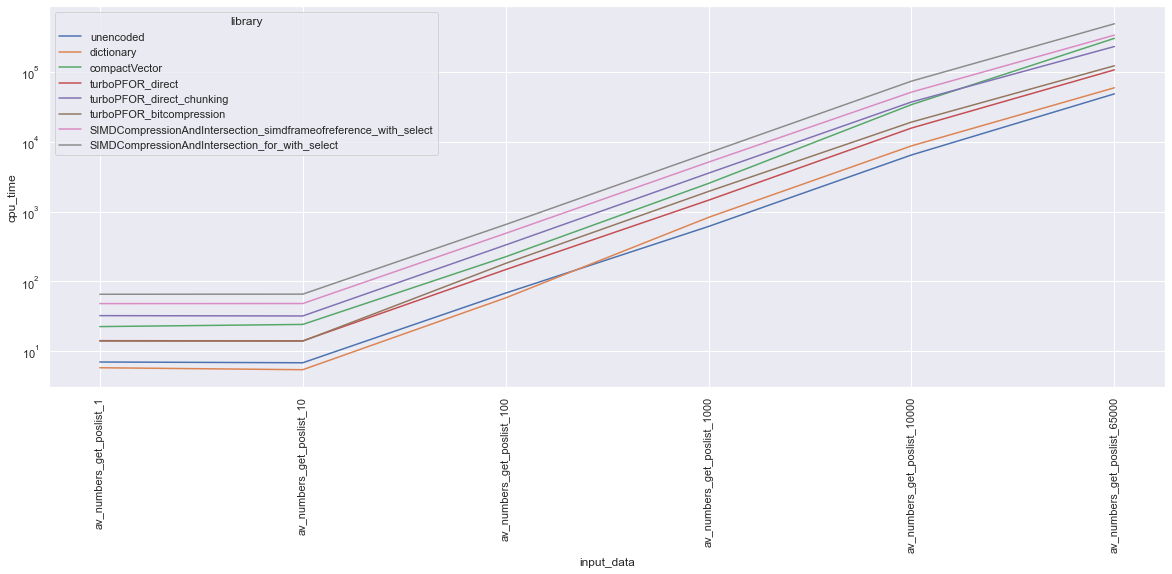

slow random access libs:  ['SIMDCompressionAndIntersection_maskedvbyte_with_select', 'SIMDCompressionAndIntersection_varint_with_select', 'SIMDCompressionAndIntersection_vbyte_with_select']


<function matplotlib.pyplot.show(close=None, block=None)>

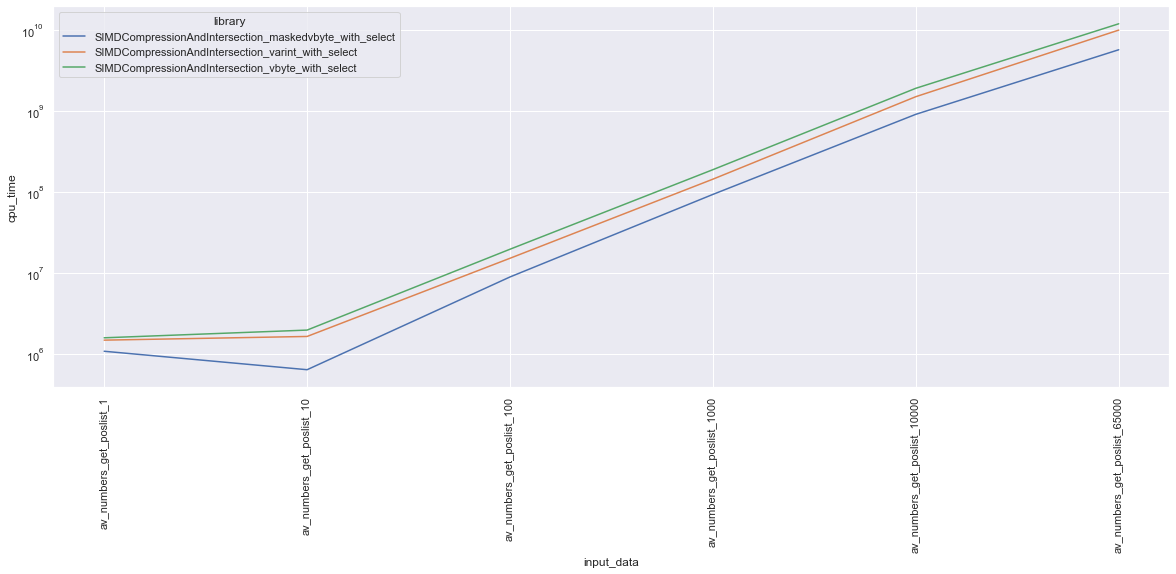

In [22]:
decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding_points_nocopy"]
av_decoding_points = decoding_points[decoding_points["input_data"].str.contains("av_numbers")][~decoding_points["input_data"].str.contains("sort")]

single_value_decodings = decoding_points[decoding_points["input_data"].str.fullmatch("av_numbers_get_poslist_1")]
fast_random_access_libs = list(single_value_decodings[single_value_decodings["cpu_time"] < 100]["library"])
slow_random_access_libs = list(single_value_decodings[single_value_decodings["cpu_time"] > 1000000]["library"])

print("fast random access libs: ", fast_random_access_libs)
fastest_points = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
plot: sns.lineplot = sns.lineplot(data=fastest_points, x="input_data", y="cpu_time", hue="library")
plt.draw()
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.show()

print("slow random access libs: ", slow_random_access_libs)
fastest_points = av_decoding_points.loc[av_decoding_points["name"].str.match(".*(" +  "|".join(slow_random_access_libs)  + ").*")]
plot: sns.lineplot = sns.lineplot(data=fastest_points, x="input_data", y="cpu_time", hue="library")
plt.draw()
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.show

## Decoding Point Based (only random access libs, detailed view for accessing 10000 out of 65000 points)

av_numbers_get_poslist_100


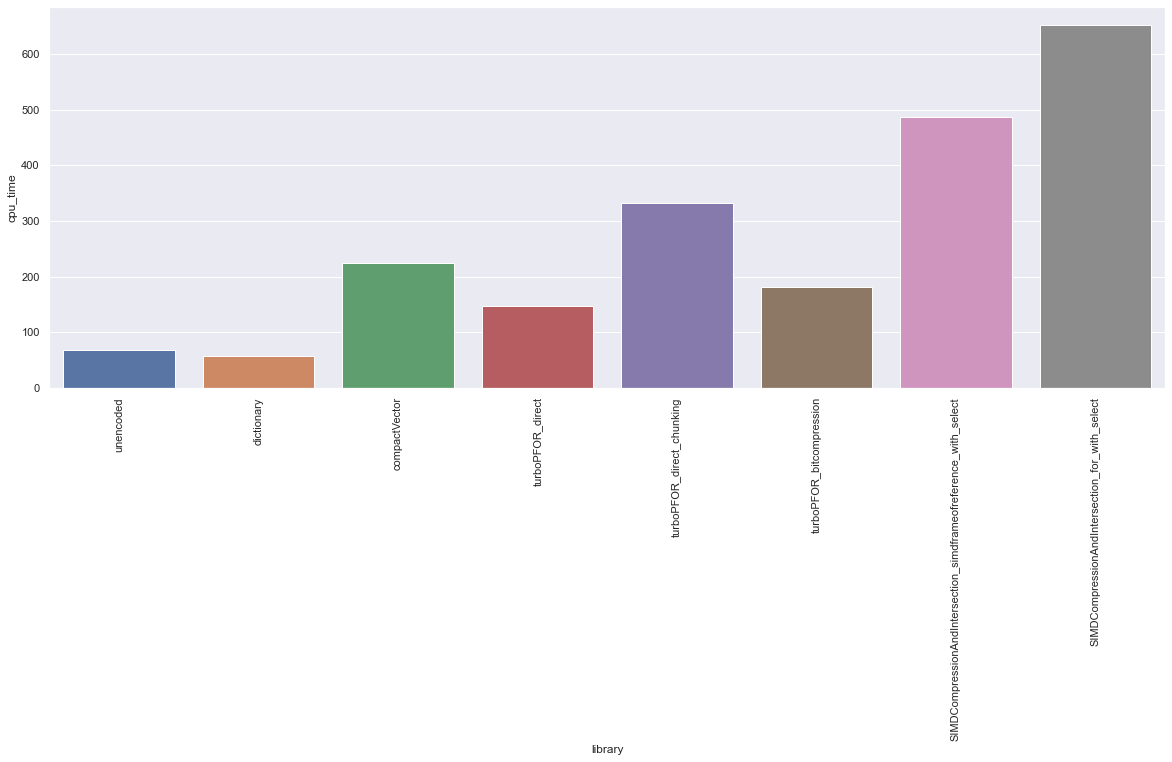

av_numbers_get_poslist_10000


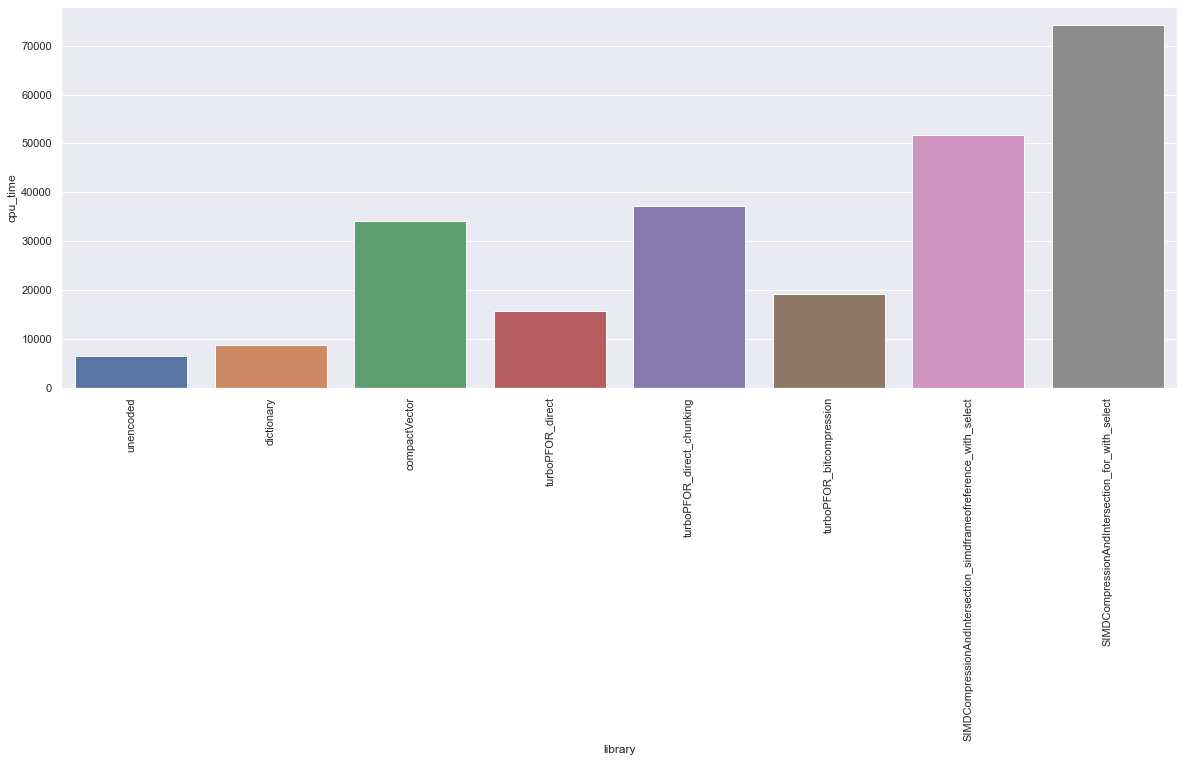

In [24]:
 for poslist_length in ["av_numbers_get_poslist_100", "av_numbers_get_poslist_10000"]:
    print(poslist_length)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"].str.contains("decoding_points_nocopy")]
    fastest_points = decoding_points.loc[decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
    fastest_points = fastest_points.loc[fastest_points["input_data"] == poslist_length]
    plot: sns.lineplot = sns.barplot(data=fastest_points, x="library", y="cpu_time")
    plot.set_yscale("linear")
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()


## Sequential decoding speed of random access libs

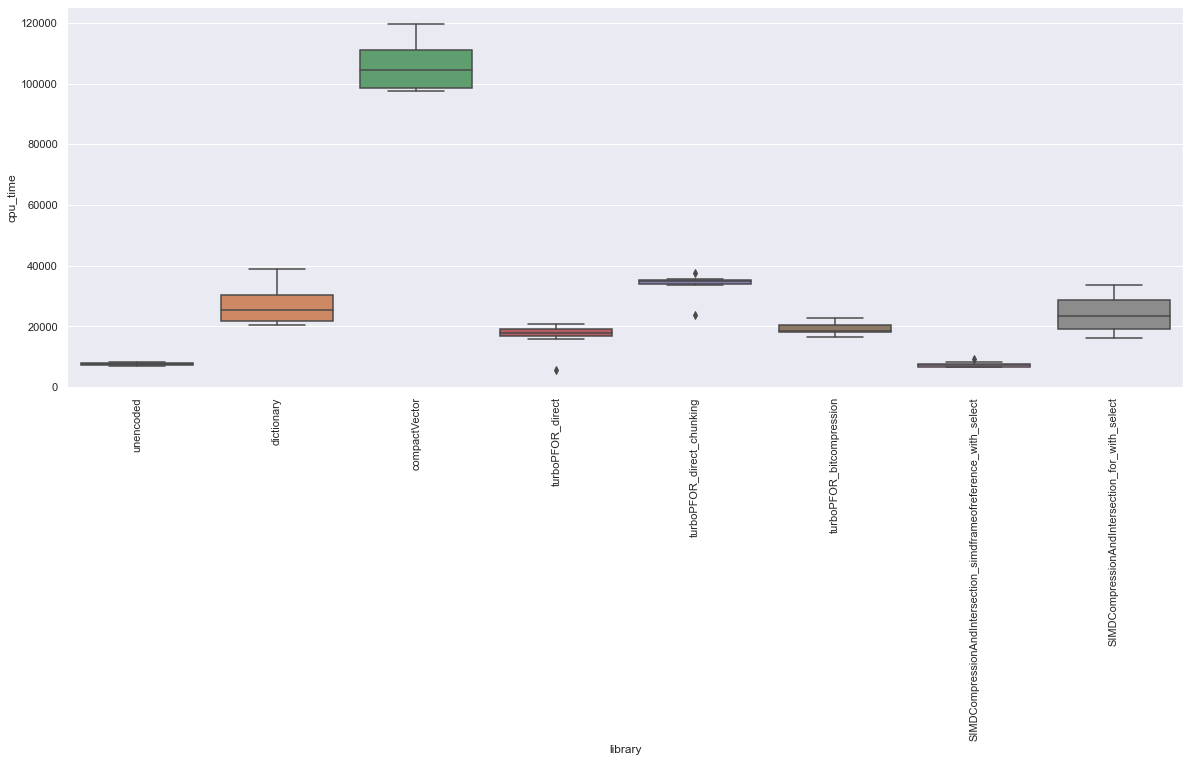

In [26]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["library"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## compression rates of fast random access libs (mean across all data distributions)

[Text(0, 0, 'unencoded'),
 Text(1, 0, 'dictionary'),
 Text(2, 0, 'compactVector'),
 Text(3, 0, 'turboPFOR_direct'),
 Text(4, 0, 'turboPFOR_direct_chunking'),
 Text(5, 0, 'turboPFOR_bitcompression'),
 Text(6, 0, 'SIMDCompressionAndIntersection_simdframeofreference_with_select'),
 Text(7, 0, 'SIMDCompressionAndIntersection_for_with_select')]

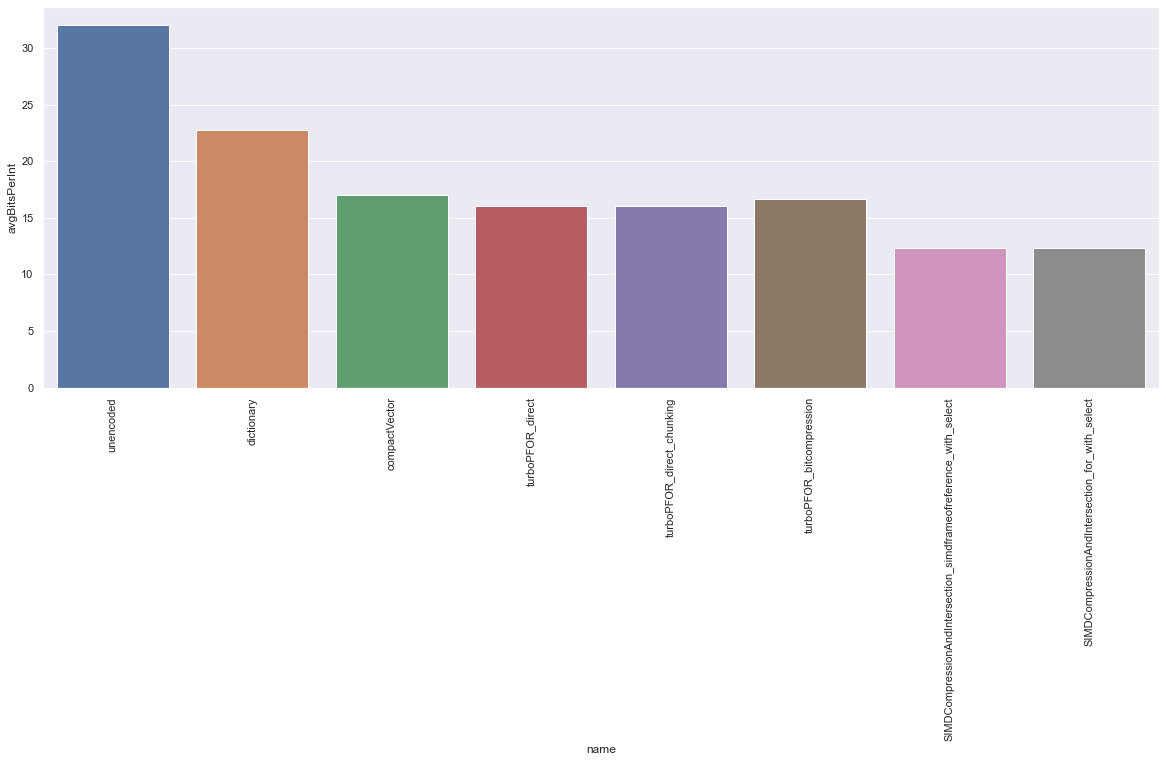

In [28]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
fast_point_compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]

def avgBitsPerInt(group):
    group["avgBitsPerInt"] = group["bitsPerInt"].mean()
    return group
fast_point_compression_stats = fast_point_compression_stats.groupby("name").apply(avgBitsPerInt)

plot = sns.barplot(data=fast_point_compression_stats, x="name", y="avgBitsPerInt")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

# todo: sort by same order

## compression rates of fast random access libs

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

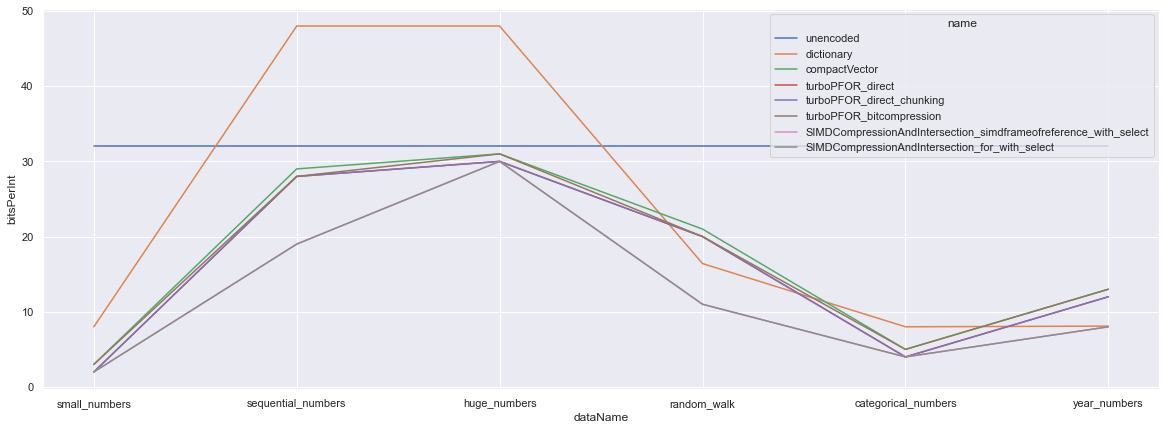

In [30]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

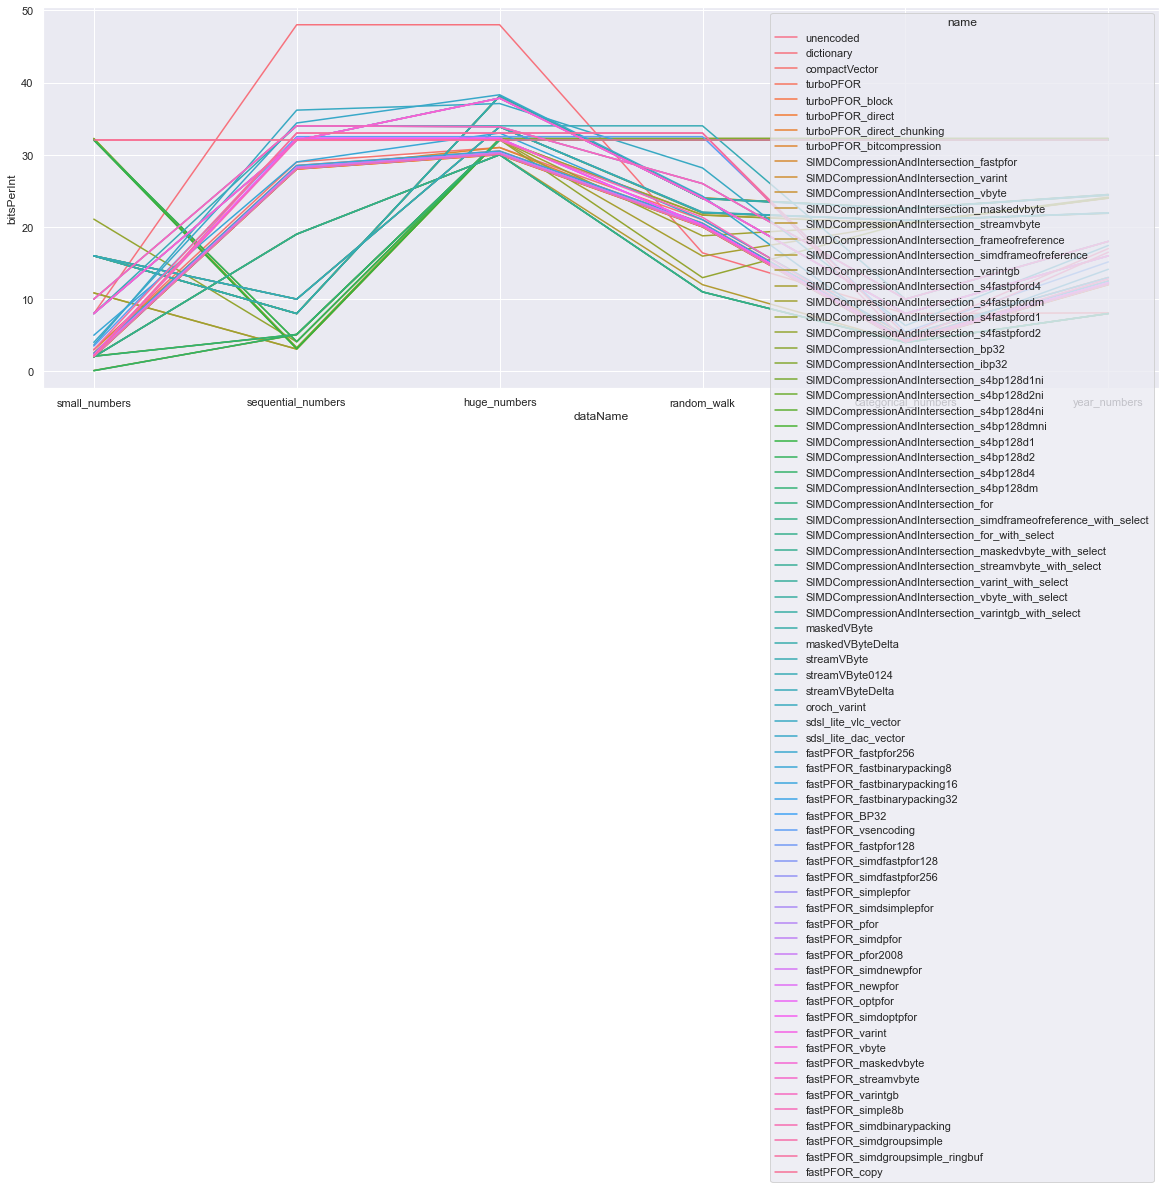

In [32]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (only smallest)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

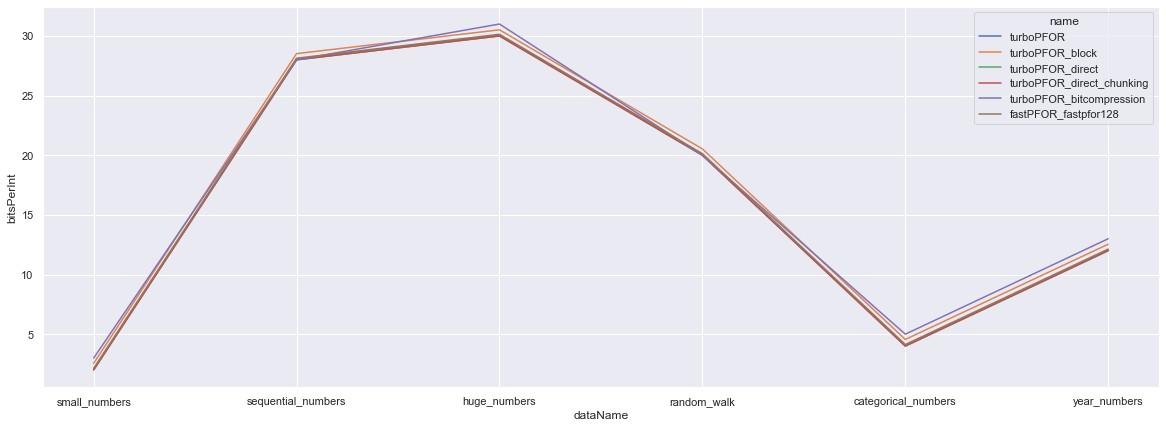

In [34]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(fastPFOR_fastpfor128|turboPFOR).*")]

sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (interesting libs)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

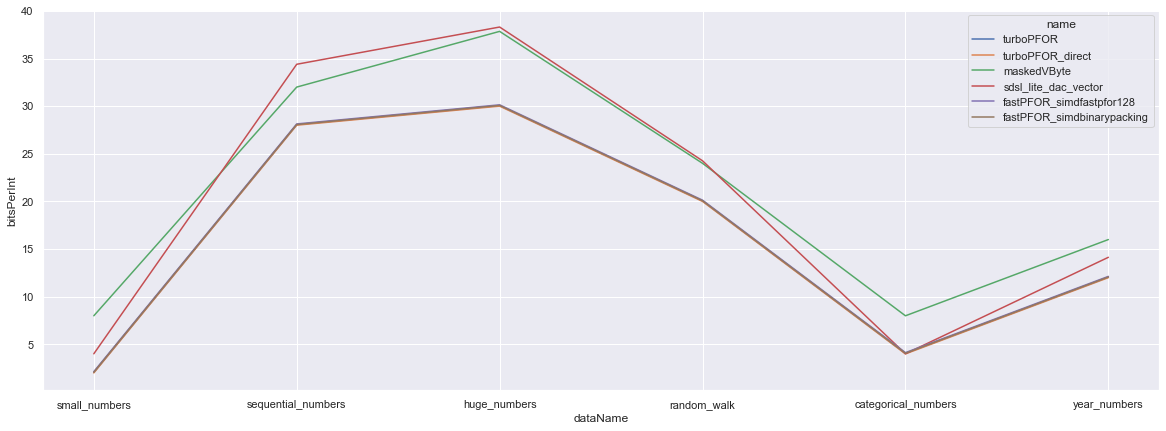

In [36]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats_filtered = compression_stats.loc[compression_stats["name"].isin(dataset_filtered["library"])]
sns.lineplot(data=compression_stats_filtered, x="dataName", y="bitsPerInt", hue="name")

## Pareto

In [38]:
compression_stats["library"] = compression_stats["name"]
combined = benchmark_speeds.merge(compression_stats, left_on=["library", "input_data"], right_on=["library", "dataName"], how="inner")
combined = combined.loc[(combined["process_type"] == "encoding")] # we don't really care about encoding times (todo: proper weighting)

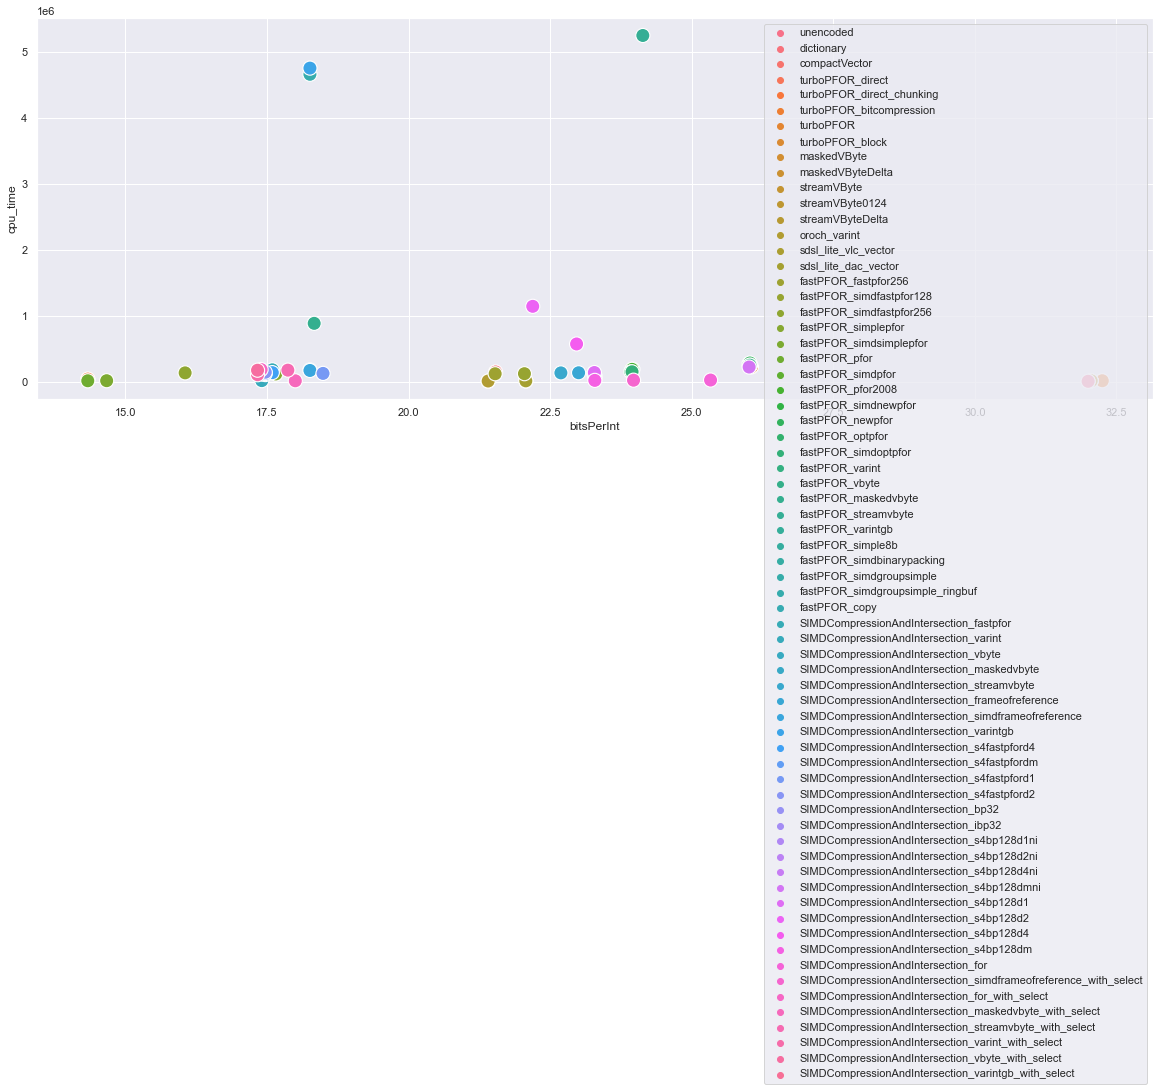

In [40]:
x = combined.groupby("library")['bitsPerInt'].mean()
y = combined.groupby("library")['cpu_time'].mean()
names = combined.library.unique()
plot = sns.scatterplot(x, y, hue=names, s=200)

## Pareto (interesting libs)

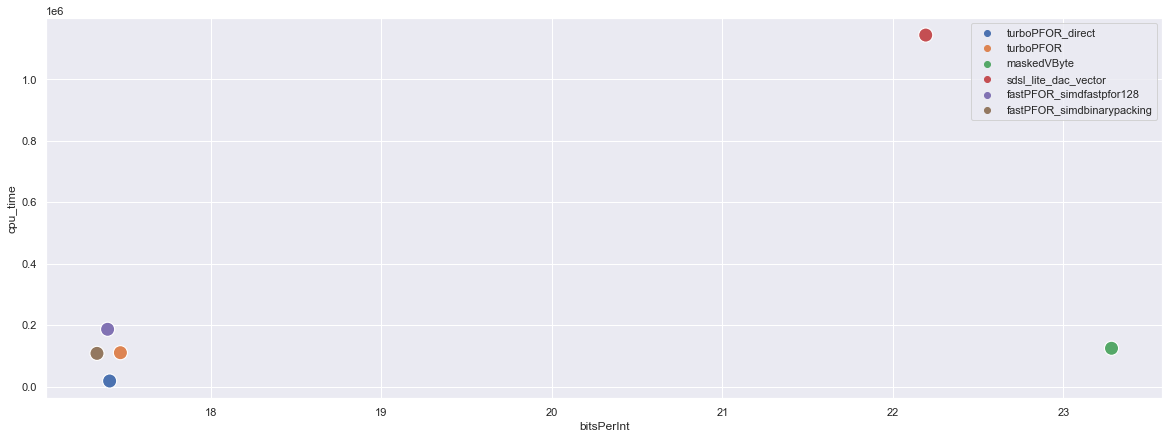

In [42]:
combined_filtered = combined.loc[(combined["library"].isin(most_interesting_libraries))]
x = combined_filtered.groupby("library")['bitsPerInt'].mean()
y = combined_filtered.groupby("library")['cpu_time'].mean()
plot = sns.scatterplot(x, y, hue=combined_filtered.library.unique(), s=200)

## Pareto (even more interesting libs :D)

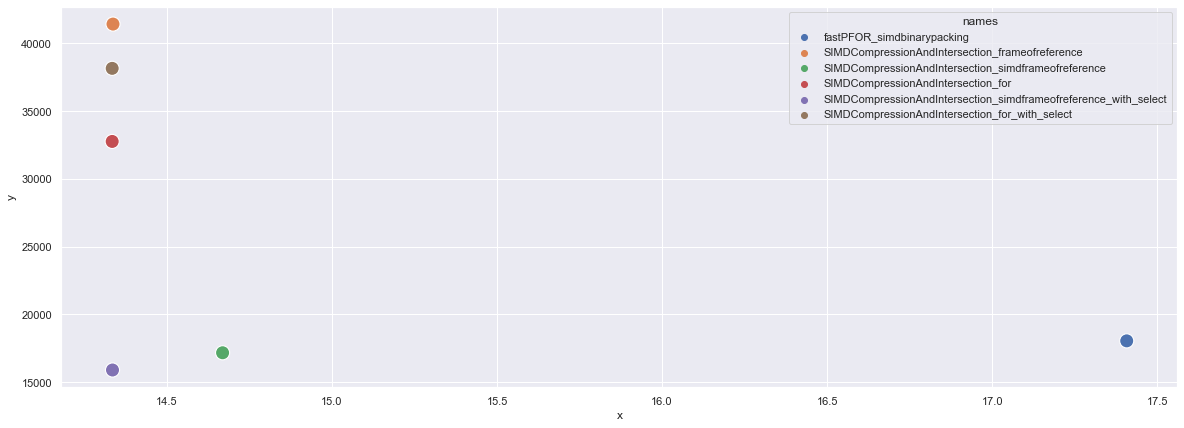

In [43]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.x < 17.7]
data = data[data.y < 50000]
#data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)


## Pareto (even more interesting libs :D)

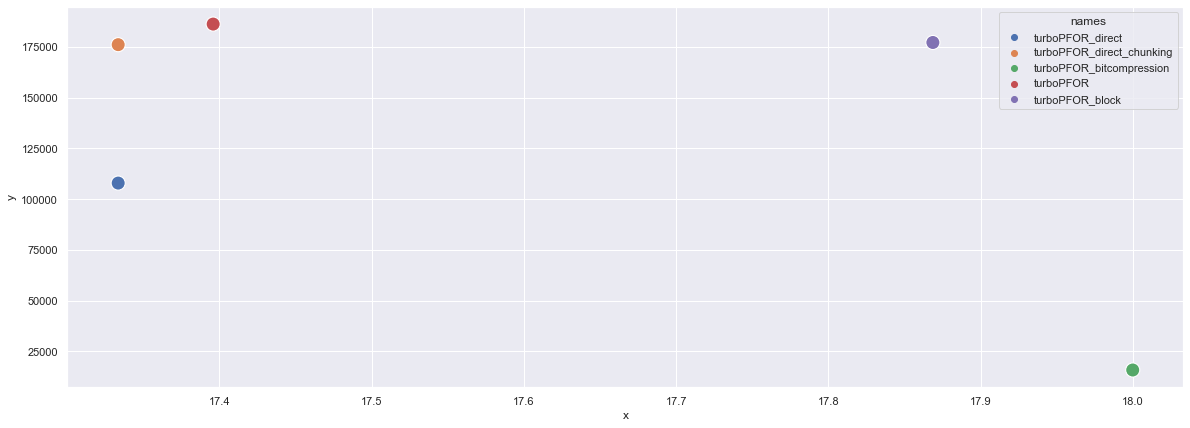

In [44]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)

## Copy vs nocopy

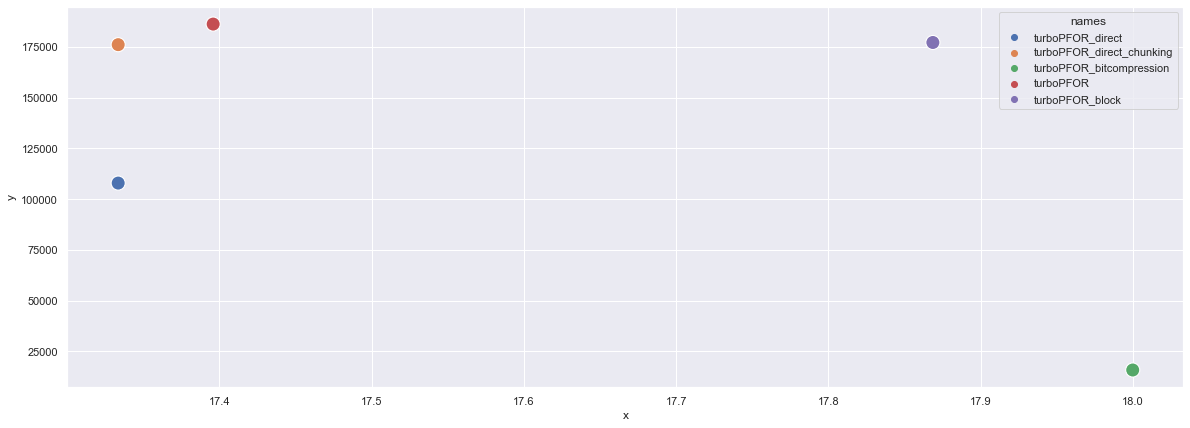

In [45]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)
